In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow import keras
plt.style.use('default')
print("TensorFlow version:", tf.__version__)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Activation, Reshape
from tensorflow.keras.initializers import RandomNormal, GlorotNormal, HeNormal
from tensorflow.keras.datasets import mnist


2023-09-25 00:53:23.774924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.13.0


# 

## Question 1: Test accuracy-M02-S09.

Simple shallow network with no layers. Executed the code for 200 epochs and calculated the test accuracy. 

In [19]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()
# Preprocess the data (scaling)
train_data = train_data / 255.0
test_data = test_data / 255.0

In [20]:
print(train_data.shape, train_label.shape)

(60000, 28, 28) (60000,)


In [21]:
model_q1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
model_q1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
training_history_q1 = model_q1.fit(train_data, train_label, epochs = 200, validation_data=(test_data, test_label) )


Epoch 1/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7812 - accuracy: 0.8119 - val_loss: 0.4822 - val_accuracy: 0.8787
Epoch 2/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4592 - accuracy: 0.8781 - val_loss: 0.4009 - val_accuracy: 0.8936
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8899 - val_loss: 0.3686 - val_accuracy: 0.8999
Epoch 4/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3784 - accuracy: 0.8961 - val_loss: 0.3487 - val_accuracy: 0.9058
Epoch 5/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3613 - accuracy: 0.9000 - val_loss: 0.3355 - val_accuracy: 0.9086
Epoch 6/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3492 - accuracy: 0.9031 - val_loss: 0.3262 - val_accuracy: 0.9109
Epoch 7/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3401 - accuracy: 0.9048 - val_loss: 0.3194 - val_ac

In [7]:
model_q1.save('q1.keras')  

Accuracy

In [24]:
train_accuracy_q1 = [round(x * 100,2) for x in training_history_q1.history['accuracy']]

### **Plot- M02-09**

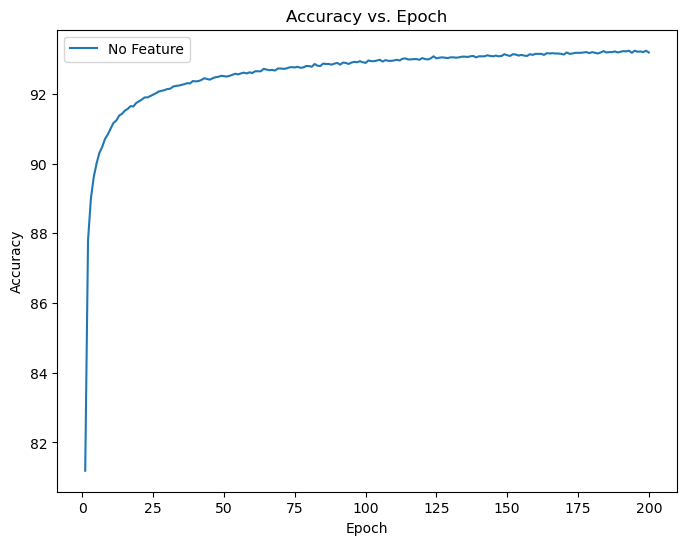

In [25]:
# Create a plot of accuracy vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy_q1)+1 ), train_accuracy_q1, label='No Feature')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Weight Visualization - No Feature**

Below visualization shows the last weights from the last layer to the output layer for each class.

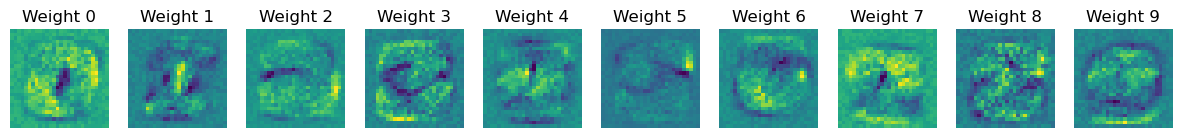

In [10]:

# Get the weights of the output layer
output_layer_weights = model_q1.layers[-1].get_weights()[0]

fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    ax = axes[i]
    ax.imshow((output_layer_weights[:, i].reshape(28, 28)), cmap='viridis')
    ax.set_title(f'Weight {i}')
    ax.axis('off')

plt.show()

# Test Accuracy - M02-S12

## Question 2 : Naive AE and Sparse AE

    2 layers in autoencoder:
    
    - Encoder: encodes the data into low dimesion with latent dimension lower than actual dimension.
    - Decoder: Reconstruct the input data with actual dimesions from latent dimesions. 
    
    - Dimension: input = 28X28 = 784
    - Latent Dimension = 100; variable, we can experiment with this. 
    
    This exampleis for Naive Autoencoder. This shows that if the feature selection is not good, it should   perform worse than even the shallow neural network.
    Second part of the question will show sparse auroencoder, i.e. if we select better features, it should   perform better than both shallow network. and naiv eauto encoder. 
    
    
    - For sparsse, I tried few combination with 800 epochs as well. Loass was coming around 0.0356 and it was not converging anymore. 
    Although the hidden unit activation was looking better but reconstruction was not looking good. So, I stick with the code I have below. 

In [26]:
#data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [27]:
encoding_dim = 100

encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(encoding_dim, activation='sigmoid')
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(28*28, activation='sigmoid'),
    tf.keras.layers.Reshape((28, 28))
])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 100)               78500     
                                                                 
 sequential_6 (Sequential)   (None, 28, 28)            79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Use SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
#0.2

autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=200, validation_data=(test_images, test_images))

Epoch 1/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0872 - val_loss: 0.0695
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0686 - val_loss: 0.0683
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - val_loss: 0.0677
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - val_loss: 0.0670
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - val_loss: 0.0659
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - val_loss: 0.0643
Epoch 7/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0633 - val_loss: 0.0624
Epoch 8/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0614 - val_loss: 0.0604
Epoch 9/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0594 - val_loss: 0.0585
Epoch 10/200
1875/1875 [==============================] - 5s 2ms/step - l

In [34]:
# ncoder weights
encoder_weights = encoder.get_weights()[0]
# Encode/decode images
encoded_images = encoder.predict(test_images)
decoded_images = decoder.predict(encoded_images)

313/313 [==============================] - 0s 1ms/step


### Encoder weights and Reconstructured images

We can see below that encoded images looks like a a blob and does not even take the shape of training data. 
All the neurons are trying to be activated even when most of the image has no actual data present. That s why the encoded weights lookslike it is activatinf all features and thus will try to over fit the data.

<Figure size 800x500 with 0 Axes>

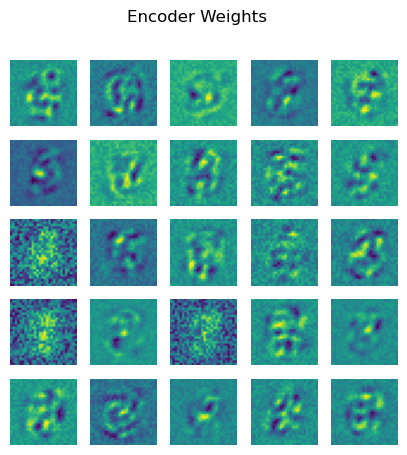

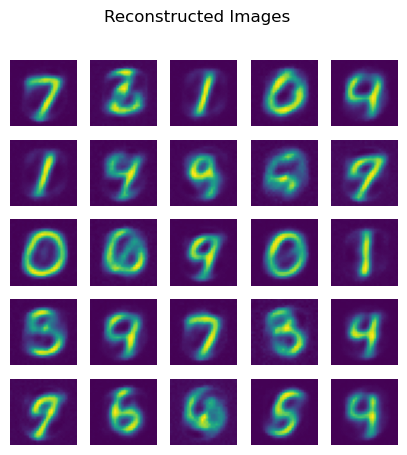

In [35]:
import matplotlib.pyplot as plt

# Create subplots for original images
plt.figure(figsize=(8, 5))
plt.suptitle('Original Images')

#for i in range(25):
#    plt.subplot(5, 5, i + 1)
#    plt.imshow(train_images[i], cmap='viridis')
#    plt.axis('off')

# Create subplots for encoder weights
plt.figure(figsize=(5, 5))
plt.suptitle('Encoder Weights')

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(encoder_weights[:, i].reshape(28, 28))
    plt.axis('off')

# Create subplots for reconstructed images
plt.figure(figsize=(5, 5))
plt.suptitle('Reconstructed Images')

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')

plt.show()


### **Hidden Batch Activation**

If we look at the hidden batch activation for sample of 150  encoder activations, we can see that all neurons are trying to fire and getting activated,which shows we have not selected the features carefully.

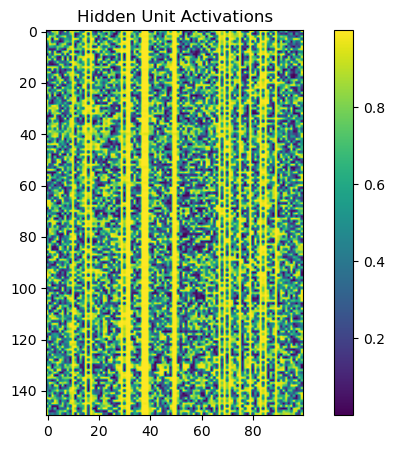

In [36]:
num_samples = 150

plt.figure(figsize=(8, 5))
im = plt.imshow(encoded_images[:150].reshape(num_samples, 100), cmap='viridis')
plt.title('Hidden Unit Activations')
plt.colorbar(im)
plt.show()

In [37]:
train_images = train_images.reshape(train_images.shape[0], -1).astype(np.float32)
test_images = test_images.reshape(test_images.shape[0], -1).astype(np.float32)

Making trainable as False, i.e. we are not allowing the weights in the Dense layer with latent dimension to be updated and hence disabling back propagation. 

In [38]:

input_dim = 784
encoding_dim = 100
classification_model_q2_nae = tf.keras.Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='sigmoid', weights=encoder.get_weights(),trainable=False),  # Use encoder's weights
    Dense(10, activation='softmax') 
])
# Compile the classification model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
classification_model_q2_nae.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the classification model
classification_model_q2_nae.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 1010 (3.95 KB)
Non-trainable params: 78500 (306.64 KB)
_________________________________________________________________


In [39]:
classification_model_q2_nae_history = classification_model_q2_nae.fit(train_images, train_labels, epochs=200,
                         validation_data=(test_images, test_labels))

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3564 - accuracy: 0.6659 - val_loss: 0.8435 - val_accuracy: 0.8322
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7314 - accuracy: 0.8419 - val_loss: 0.6151 - val_accuracy: 0.8623
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5924 - accuracy: 0.8583 - val_loss: 0.5294 - val_accuracy: 0.8704
Epoch 4/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5301 - accuracy: 0.8646 - val_loss: 0.4842 - val_accuracy: 0.8763
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4936 - accuracy: 0.8696 - val_loss: 0.4564 - val_accuracy: 0.8800
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4694 - accuracy: 0.8733 - val_loss: 0.4365 - val_accuracy: 0.8842
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4517 - accuracy: 0.8753 - val_loss: 0.4212 - val_ac

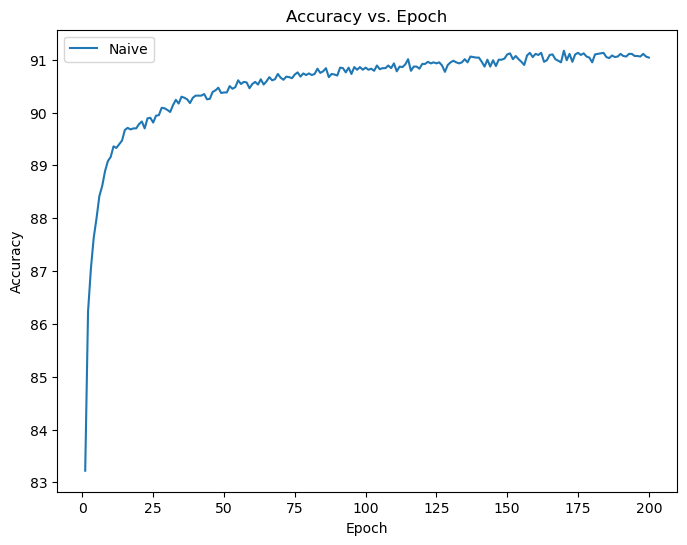

In [52]:
test_accuracies_q2_nae = classification_model_q2_nae_history.history['val_accuracy']
test_accuracy_q2_nae =[round(x * 100,2) for x in test_accuracies_q2_nae]
# Create a plot of accuracy vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(test_accuracy_q2_nae)+1 ), test_accuracy_q2_nae, label='Naive')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Naive AE with Full BP code

In [102]:
classification_model_q2_nae_bp = tf.keras.Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='sigmoid', weights=encoder.get_weights()),  # Use encoder's weights
    Dense(10, activation='softmax')  
])
# Compile the classification model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
classification_model_q2_nae_bp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the classification model
classification_model_q2_nae_bp.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
classification_model_q2_nae_bp_history = classification_model_q2_nae_bp.fit(train_images, train_labels, epochs=200,
                         validation_data=(test_images, test_labels))

Epoch 1/200
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2025 - accuracy: 0.7211 - val_loss: 0.6081 - val_accuracy: 0.8694
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5133 - accuracy: 0.8760 - val_loss: 0.4186 - val_accuracy: 0.8962
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4028 - accuracy: 0.8926 - val_loss: 0.3545 - val_accuracy: 0.9081
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.9031 - val_loss: 0.3199 - val_accuracy: 0.9150
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3238 - accuracy: 0.9104 - val_loss: 0.2968 - val_accuracy: 0.9194
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3024 - accuracy: 0.9158 - val_loss: 0.2793 - val_accuracy: 0.9235
Epoch 7/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.9202 - val_loss: 0.2655 - val_ac

In [118]:
test_accuracies_q2_nae_bp = classification_model_q2_nae_bp_history.history['val_accuracy']
test_accuracies_q2_nae_bp =[round(x * 100,2) for x in test_accuracies_q2_nae_bp]
# Create a plot of accuracy vs. epoch
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(test_accuracies_q2_nae_bp)+1 ), test_accuracies_q2_nae_bp, label='Naive', color = 'r')
#plt.title('Accuracy vs. Epoch')
#plt.xlabel('Epoch')
#plt.ylim(0,100)
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

## Sparse AE

    As oppose to Naive encoder, We will add regularization on the encoder layer and add that to the loss term. 
Lambda selected is .1 and target sparsity is 0.2. This was selected based on multiple iterations and experiments. 
We can see in the encoded weights that now the pixels which are activated are less (sparsity enforced). 
This means we are selecting fewer features and which will enevtaully lead to better accuracy in test accuracies with less features. 

For this, I have used a custom regularizer function which will wok on the encoded data and apply regularization by enforcing sparsity on the data. This will be added to the loss and thus will try to fire only the neurons which are highly activated by theincoming data. 

In [3]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0


In [7]:
kld = tf.keras.losses.kullback_leibler_divergence
K = tf.keras.backend
alpha = 0.2
lm = 0.1
def klloss(inputs):
  alpha_hat = K.mean(inputs, axis = 0)
  return lm * (K.sum(kld(alpha, alpha_hat)+ kld((1-alpha),(1-alpha_hat))))
  

In [8]:
#https://www.tensorflow.org/tutorials/generative/autoencoder

class Sparse_Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim, shape):
        super(Sparse_Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = Sequential([
            Flatten(input_shape=shape),
            Dense(latent_dim, activation='sigmoid', activity_regularizer = klloss),
        ])
        self.decoder = Sequential([
            Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            Reshape(shape),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
shape = train_images.shape[1:]  
latent_dim = 100
sencoder = Sparse_Autoencoder(latent_dim, shape)

In [10]:

optimizer = tf.keras.optimizers.SGD(learning_rate=.15)

sencoder.compile(optimizer=optimizer, loss='mean_squared_error',metrics = ["accuracy"])

In [11]:
sencoder.fit(train_images, train_images, epochs=500,batch_size = 128,shuffle=True, validation_data=(test_images, test_images))

Epoch 1/500
469/469 [==============================] - 4s 5ms/step - loss: 0.2108 - accuracy: 0.0388 - val_loss: 0.1810 - val_accuracy: 0.0536
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1601 - accuracy: 0.0596 - val_loss: 0.1432 - val_accuracy: 0.0637
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1315 - accuracy: 0.0674 - val_loss: 0.1230 - val_accuracy: 0.0727
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1167 - accuracy: 0.0756 - val_loss: 0.1124 - val_accuracy: 0.0786
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1083 - accuracy: 0.0800 - val_loss: 0.1057 - val_accuracy: 0.0816
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1028 - accuracy: 0.0822 - val_loss: 0.1010 - val_accuracy: 0.0829
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0988 - accuracy: 0.0828 - val_loss: 0.0975 - val_accuracy: 0.0829

In [12]:
encoded_imgs = sencoder.encoder.predict(test_images)
decoded_imgs = sencoder.decoder.predict(encoded_imgs)
encoder_weights, encoder_bias = sencoder.encoder.get_weights()

313/313 [==============================] - 1s 2ms/step


### **Encoder weights and Reconstructured images**

By enforcing regularization using KL divergence on the encoder data, we can see that now weights of the encoder 
layer are taking the shape od the numbers, which are the images we provided. This is when we have used the latent dimension 
of 100, i.e. almost 12% of the actual dimensions present in the actual data. This can be very useful in the data compression and regenerating t he same data again but with using compact data.

<Figure size 800x500 with 0 Axes>

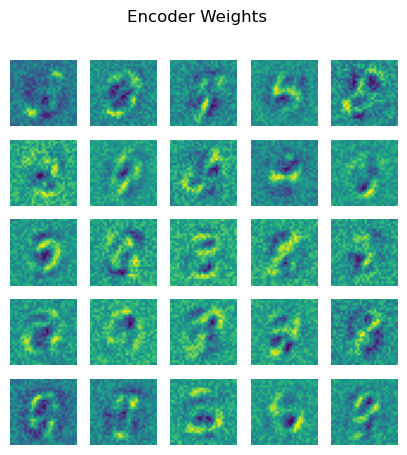

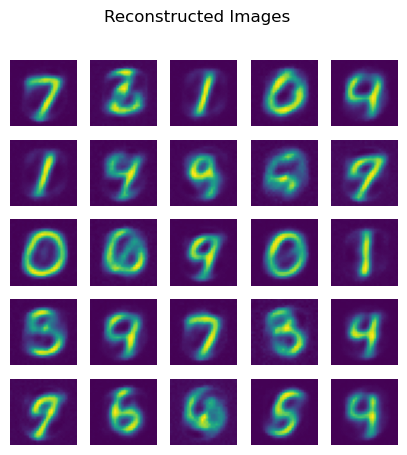

In [13]:
import matplotlib.pyplot as plt

# Create subplots for original images
plt.figure(figsize=(8, 5))
plt.suptitle('Original Images')

#for i in range(25):
#    plt.subplot(5, 5, i + 1)
#    plt.imshow(train_images[i], cmap='viridis')
#    plt.axis('off')

# Create subplots for encoder weights
plt.figure(figsize=(5, 5))
plt.suptitle('Encoder Weights')

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(encoder_weights[:, i].reshape(28, 28))
    plt.axis('off')

# Create subplots for reconstructed images
plt.figure(figsize=(5, 5))
plt.suptitle('Reconstructed Images')

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')

plt.show()

Below sample activatio plot shows that not all neurons are firing, as we have applied sparsity on the
encoder layer. W ehave chosen sparsity as 15 % whcih si making only thos enumber of neurons to 
actively participate in activation and hence in decoding.

### **Hidden Batch Activation**

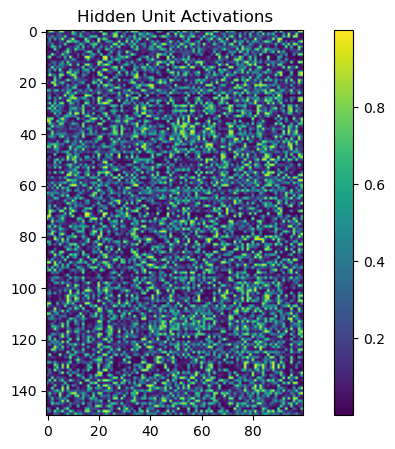

In [14]:
num_samples = 150
plt.figure(figsize=(8, 5))
im = plt.imshow(encoded_imgs[:150].reshape(num_samples, 100), cmap='viridis')
plt.title('Hidden Unit Activations')
plt.colorbar(im)
plt.show()

In [15]:
train_images = train_images.reshape(train_images.shape[0], -1).astype(np.float32)
test_images = test_images.reshape(test_images.shape[0], -1).astype(np.float32)
#encoder_weights_1, encoder_bias_1 = autoencoder.layers[1].get_weights()
# Create a downstream classification model after the encoder
input_dim = 784
encoding_dim = 100
classification_model_q2_sae = tf.keras.Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='sigmoid', weights=sencoder.encoder.get_weights(),trainable=False),  # Use encoder's weights
    Dense(10, activation='softmax')  # Example classification layer with 10 classes
])
# Compile the classification model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.15)
classification_model_q2_sae.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the classification model
classification_model_q2_sae.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 1010 (3.95 KB)
Non-trainable params: 78500 (306.64 KB)
_________________________________________________________________


In [16]:
classification_model_q2_sae_history = classification_model_q2_sae.fit(train_images, train_labels, epochs=200,
                         validation_data=(test_images, test_labels))

Epoch 1/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5515 - accuracy: 0.8431 - val_loss: 0.4056 - val_accuracy: 0.8833
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8850 - val_loss: 0.3544 - val_accuracy: 0.8982
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8962 - val_loss: 0.3279 - val_accuracy: 0.9057
Epoch 4/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3309 - accuracy: 0.9030 - val_loss: 0.3117 - val_accuracy: 0.9113
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.9071 - val_loss: 0.2957 - val_accuracy: 0.9154
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9099 - val_loss: 0.2849 - val_accuracy: 0.9171
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.9133 - val_loss: 0.2773 - val_ac

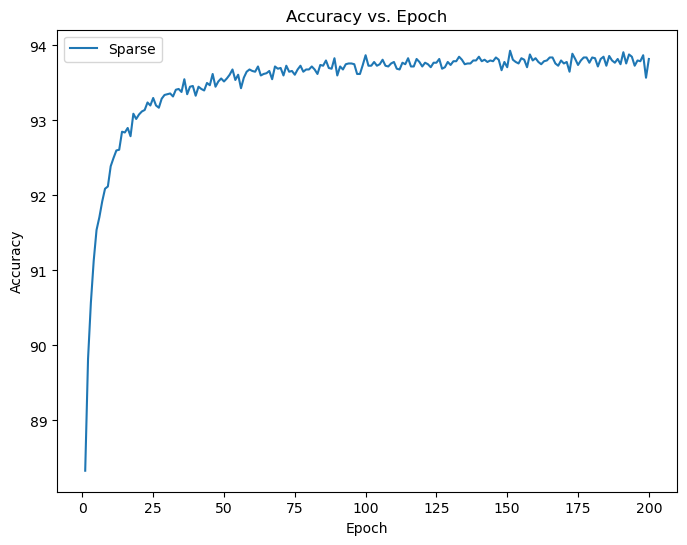

In [17]:
test_accuracies_q2_sae= classification_model_q2_sae_history.history['val_accuracy']
test_accuracies_q2_sae =[round(x * 100,2) for x in test_accuracies_q2_sae]
# Create a plot of accuracy vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(test_accuracies_q2_sae)+1 ), test_accuracies_q2_sae, label='Sparse')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
#plt.ylim(82, 94)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Sparse AE with Full BP code

In [151]:
input_dim = 784
encoding_dim = 100
classification_model_q2_sae_bp = tf.keras.Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='sigmoid', weights=encoder.get_weights()),  # Use encoder's weights
    Dense(10, activation='softmax') 
])
# Compile the classification model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.015)
classification_model_q2_sae_bp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [152]:
classification_model_q2_sae_bp_history = classification_model_q2_sae_bp.fit(train_images, train_labels, epochs=200,
                         validation_data=(test_images, test_labels))

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8881 - accuracy: 0.5142 - val_loss: 1.3241 - val_accuracy: 0.7209
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9806 - accuracy: 0.7990 - val_loss: 0.7305 - val_accuracy: 0.8483
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6367 - accuracy: 0.8559 - val_loss: 0.5397 - val_accuracy: 0.8777
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8757 - val_loss: 0.4555 - val_accuracy: 0.8885
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8858 - val_loss: 0.4076 - val_accuracy: 0.8940
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4059 - accuracy: 0.8919 - val_loss: 0.3773 - val_accuracy: 0.8982
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8969 - val_loss: 0.3559 - val_ac

In [156]:
test_accuracies_q2_sae_bp= classification_model_q2_sae_bp_history.history['val_accuracy']
test_accuracies_q2_sae_bp =[round(x * 100,2) for x in test_accuracies_q2_sae_bp]
# Create a plot of accuracy vs. epoch
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(test_accuracies_q2_sae_bp)+1 ), test_accuracies_q2_sae_bp, label='Sparse')
#plt.title('Accuracy vs. Epoch')
#plt.xlabel('Epoch')
#plt.ylim(82, 94)
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

## **Plot - M02-012**

    No Feature ~ 92%
    Naive      ~ 91%
    Sparse     ~ 94%
    
    Below graph show for a simple shallow network, test accuracy is approc 92%. But if we choose the bad features, the accuracy drops even lower than the shallow network. But, if we choose better features, by applying regularization and enforce sparsity, we can get better test accuracy that too with encoded dimension being only approx ~12% of th etotal size of the image. This helps us show the benefits of regularization which also helps reducing overfitting.

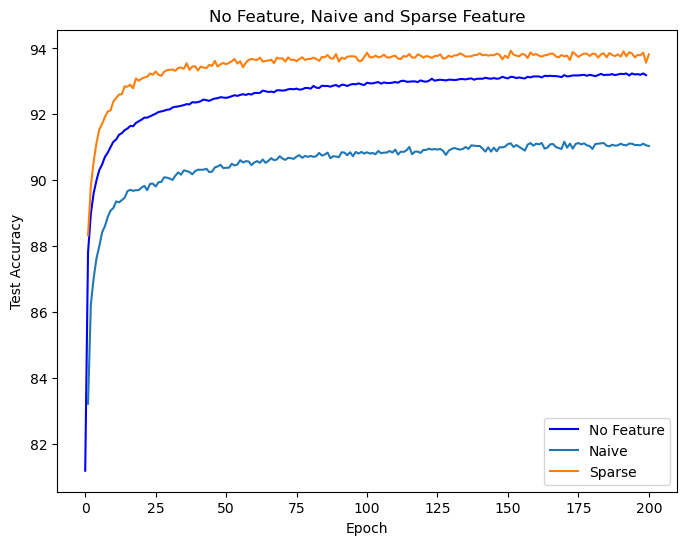

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_q1, label='No Feature', color = 'blue')
plt.plot(range(1, len(test_accuracy_q2_nae)+1 ), test_accuracy_q2_nae, label='Naive')
plt.plot(range(1, len(test_accuracies_q2_sae)+1 ), test_accuracies_q2_sae, label='Sparse')
plt.title('No Feature, Naive and Sparse Feature')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

# Test accuracy-M02-S14.

##  Question 3: Backpropagation on a Shallow Network

As mention in the slide, I am taking initial weight and bias and random;y initializing them and using back propogation to update the weights of Dense layers. This will showcase that even with no feature selection, back propogation on a neural network will provide better results than shallow network, naive/sparse autoencoders. 

In [43]:
(train_data_full, train_label_full), (test_data_full, test_label_full) = mnist.load_data()
train_label, test_label = train_label_full,test_label_full
# Preprocess the data (scaling)
train_data = train_data_full / 255.0
test_data = test_data_full / 255.0

In [44]:
model_q3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Initialize weights randomly
model_q3.layers[1].set_weights([np.random.randn(784, 100)* 0.01, np.zeros(100)]) 
model_q3.layers[2].set_weights([np.random.randn(100, 10)* 0.01, np.zeros(10)])  
model_q3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model_q3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
training_history_q3 = model_q3.fit(train_data, train_label, epochs=200,
                         validation_data=(test_data, test_label))

Epoch 1/200
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9557 - accuracy: 0.3789 - val_loss: 1.1918 - val_accuracy: 0.6999
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8252 - accuracy: 0.7919 - val_loss: 0.5912 - val_accuracy: 0.8463
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5192 - accuracy: 0.8646 - val_loss: 0.4412 - val_accuracy: 0.8841
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4202 - accuracy: 0.8872 - val_loss: 0.3774 - val_accuracy: 0.8979
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3721 - accuracy: 0.8976 - val_loss: 0.3416 - val_accuracy: 0.9051
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.9040 - val_loss: 0.3204 - val_accuracy: 0.9099
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3235 - accuracy: 0.9086 - val_loss: 0.3032 - val_ac

In [47]:
test_accuracies_q3 = training_history_q3.history['val_accuracy']
test_accuracy_q3 =[round(x * 100,2) for x in test_accuracies_q3]
# Create a plot of accuracy vs. epoch
#plt.figure(figsize=(8, 6))
#plt.plot( test_accuracy_q3, label='NN')
#plt.title('Accuracy vs. Epoch')
#plt.xlabel('Epoch')
#plt.ylim(80,100)
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

As we have seen the No feature, Autoencoders with naive features and Sparse features, now we will see what if we have a NN with no features but it has back propogation. What it will do is it will learn the loss and pass the back propogation error to all the layers and update the weights accordingly. Doing so, even with no feature selected, we get approx ~96-97% accuracy from NN. The difference with NN and others is that in both auroencoders, the encoded weights are not gettign updated from the back propogation loss and the weights for the latent dimension on the autoencoders is set to not get updated. This shows the benefit of updating the weights using back propogation. 

### **Plot M02 -14**

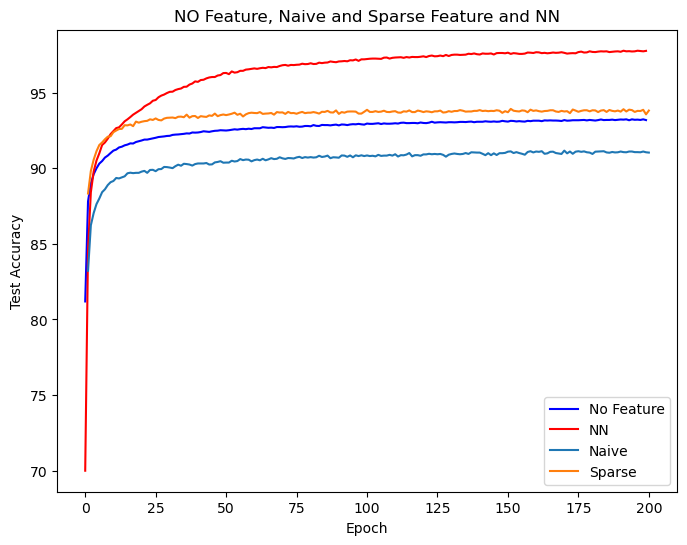

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_q1, label='No Feature', color = 'blue')
plt.plot( test_accuracy_q3, label='NN', color = 'r')
plt.plot(range(1, len(test_accuracy_q2_nae)+1 ), test_accuracy_q2_nae, label='Naive')
plt.plot(range(1, len(test_accuracies_q2_sae)+1 ), test_accuracies_q2_sae, label='Sparse')
plt.title('No Feature, Naive and Sparse Feature and NN')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
#plt.ylim(40,100)
plt.show()

# M02-S17

## Question 4: Full BP training of both layers -Plot

**Code for full back propagation are present in corresponding section:1.1, 2.1.3, 2.2.3,and 3.1**

Here, we can see that, once the weights of all layers are adjusted through back propagation, bad selection of features (naive) and somewhat better selection of features (sparse), all yield almost same result as a neural network without  any feature selection but with back propagation enabled. This shows that adjusting the weights with respect to back propagation error on each epoch yields better result as we train the model. 

### **Plot M02-S17**

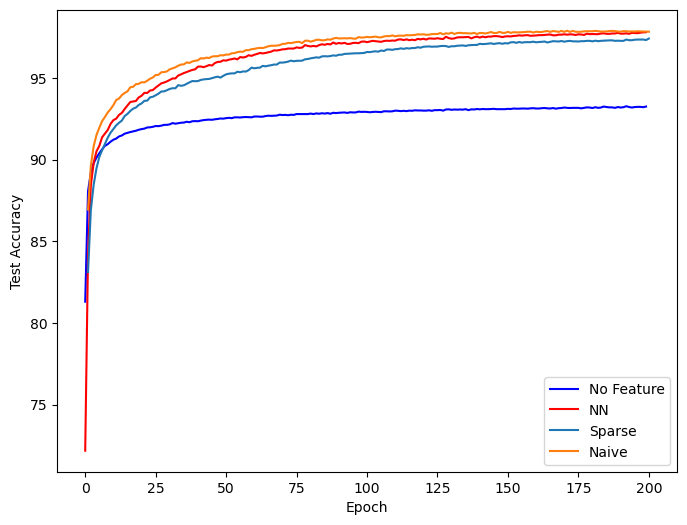

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_q1, label='No Feature', color = 'blue')
plt.plot(test_accuracy_q3, label='NN',color = 'red')
plt.plot(range(1, len(test_accuracies_q2_sae_bp)+1 ), test_accuracies_q2_sae_bp, label='Sparse')
plt.plot(range(1, len(test_accuracies_q2_nae_bp)+1 ), test_accuracies_q2_nae_bp, label='Naive',)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
#plt.ylim(40,100)
plt.show()

## Activations and Initializations -M03

In [216]:
# Load and preprocess the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

Creating a dict of parameters to be used. 

In [217]:
#architecture parameters
num_hidden_layers = 5
hidden_units = 512
num_epochs = 50

activation_init_sets = [
    {'name': 'ReLU-He', 'activation': 'relu', 'initializer': tf.keras.initializers.HeNormal(seed=123)},
    {'name': 'ReLU-Xavier', 'activation': 'relu', 'initializer': tf.keras.initializers.GlorotNormal(seed=123)},
    {'name': 'ReLU-Normal', 'activation': 'relu', 'initializer': tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01,seed=123)},
    {'name': 'Sigmoid-Normal', 'activation': 'sigmoid', 'initializer': tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=123)},
    {'name': 'Sigmoid-Xavier', 'activation': 'sigmoid', 'initializer': tf.keras.initializers.GlorotNormal(seed=123)}
]



In [218]:

#test accuracy for both BN and Non-BN models
test_accuracy_bn = []
test_accuracy_non_bn = []

# Training loop for each network
for batch_norm_enabled in [False]:  #removed True which is for BN.
    
    for setting, params in enumerate(activation_init_sets, start=1):
       
        model = tf.keras.Sequential()
        model.add(Flatten(input_shape=(28, 28))) 
        
        if batch_norm_enabled:
            model.add(BatchNormalization()) 
        
        for _ in range(num_hidden_layers): 
            model.add(Dense(units=hidden_units, activation=params['activation'],
                            kernel_initializer=params['initializer']))
            
            if batch_norm_enabled:
                model.add(BatchNormalization())  
        
        model.add(Dense(10, activation=tf.nn.softmax))
        
        if setting == 1:
            print("____________________________________________________________________________________________")
            print(" Sample Model Summary")
            print("____________________________________________________________________________________________")
            model.summary()
        print("")
        print(f"Model {setting}: Activation={params['activation']}, Initialization={params['initializer'].__class__.__name__}")
        
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.0017)
            
        # slow 0.001, fast 0.01, 0.05, 0.005
        # good : 0.002
        #better 0.0015
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Training
        history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels))
        model_name = f"Model{setting}-{params['activation']}-{params['initializer'].__class__.__name__}"
        
        if batch_norm_enabled:
            model_name += "-bn"
        
        print(model_name)
        model.save(f'{model_name}.keras')
        
        # Save test accuracy
        if batch_norm_enabled:
            test_accuracy_bn.append(history.history['val_accuracy'])
        else:
            test_accuracy_non_bn.append(history.history['val_accuracy'])
        
        print("____________________________________________________________________________________________")


____________________________________________________________________________________________
 Sample Model Summary
____________________________________________________________________________________________
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_171 (Dense)           (None, 512)               401920    
                                                                 
 dense_172 (Dense)           (None, 512)               262656    
                                                                 
 dense_173 (Dense)           (None, 512)               262656    
                                                                 
 dense_174 (Dense)           (None, 512)               262656    
                                           

In [219]:
test_accuracy_non_bn_bkp = test_accuracy_non_bn

### **Plot M03-Pg 22**

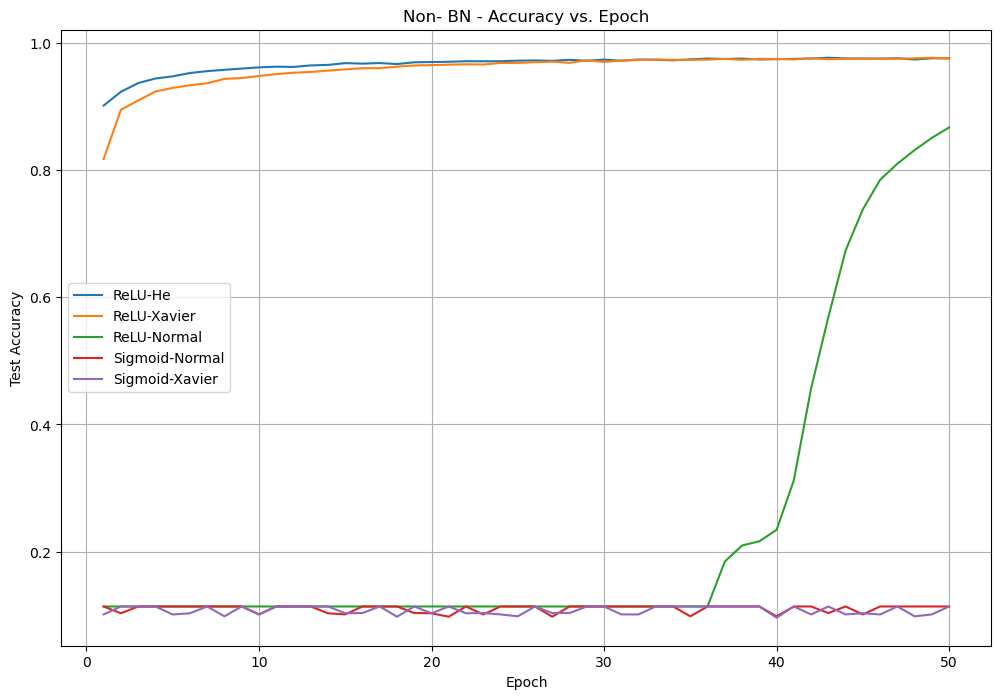

In [220]:

model_labels = [key['name']for key in activation_init_sets]
# Plot accuracy vs. epoch for each model
plt.figure(figsize=(12,8))
for i, label in zip(range(len(model_labels)), model_labels):
    plt.plot(range(1, num_epochs + 1), test_accuracy_non_bn[i], label=label)

plt.title('Non- BN - Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

No that we have seen how neural network works, lets see how different activations and initializations impact the network.from the plot, we can see that relu, which imparts sparcity to the model, when provided with better choice of activation and initialization, converges very quickly and when the same relu function is provided with random initialization, it takes much larger epoch to converge. 
On the other hand, the sigmoid, with both random and Xavier initialization provide bad results only. 

This shows the imporatnce of the activation and initialization we use for the neural network. Bad parameter choice can fail the deep neural network. 